KPIs:

Debes graficar y medir los 2 KPIs propuestos a continuación, representándolos adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un tercer KPI que consideres relevante para la temática. Los dos KPIs propuestos son:

1) Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

2) Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

Tercer KPI para la seguridad vial en CABA:
Teniendo en cuenta los dos KPIs existentes, que se enfocan en la reducción de la tasa de homicidios en siniestros viales y la cantidad de accidentes mortales de motociclistas, se propone un tercer KPI que complemente estos esfuerzos y abarque una perspectiva más amplia de la seguridad vial en CABA:

3) Reducir en un 10% la tasa de lesiones graves por siniestros viales en CABA, en comparación con el año anterior.

Definición: La tasa de lesiones graves por siniestros viales se define como el número de personas que sufren lesiones graves en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.

Fórmula: (Número de lesiones graves en siniestros viales / Población total) * 100,000

Explicación:

Las lesiones graves se consideran aquellas que ponen en riesgo la vida o generan una discapacidad permanente.
Incluir este KPI permite abordar la seguridad vial desde una perspectiva más integral, ya que no solo se centra en las víctimas fatales, sino también en aquellas que sufren consecuencias graves y duraderas a causa de los siniestros.
Al reducir la tasa de lesiones graves, se contribuye a disminuir la carga sobre el sistema de salud y mejorar la calidad de vida de las personas afectadas.

Consideraciones:
El valor de X (porcentaje de reducción) debe establecerse en función de un análisis previo de los datos históricos y considerando metas realistas y alcanzables.
Es importante recopilar datos precisos y confiables sobre las lesiones graves en siniestros viales, lo que puede requerir la colaboración de diversas entidades, como hospitales, centros de salud y organismos gubernamentales.

Al igual que los otros dos KPIs, este indicador debe ser monitoreado y evaluado periódicamente para medir su impacto y realizar los ajustes necesarios en las estrategias de seguridad vial.

Beneficios de incluir este tercer KPI:
Permite tener una visión más completa de la situación de la seguridad vial en CABA.
Ayuda a identificar áreas donde se pueden tomar medidas para reducir la gravedad de los siniestros viales.
Sensibiliza a la población sobre la importancia de la seguridad vial y las consecuencias de los accidentes de tránsito.
Contribuye a mejorar la calidad de vida de las personas afectadas por los siniestros viales.

En conjunto, estos tres KPIs:
Proporcionan una base sólida para evaluar la efectividad de las políticas y programas de seguridad vial en CABA.
Permiten enfocar los esfuerzos en diferentes aspectos de la seguridad vial, desde la prevención de muertes hasta la reducción de las lesiones graves.
Contribuyen a crear un entorno vial más seguro para todos los usuarios, incluyendo conductores, motociclistas, ciclistas y peatones.

In [6]:
# Librerías necesarias
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Abrir archivos .csv HOMICIDIOS GENERAL
data_homicidios_gral = pd.read_csv("df_homic_lista.csv")

In [8]:
# Abrir archivos .csv HOMICIOS ESPECÍFICOS
data_homicidios_espec = pd.read_csv("espec_homicid.csv")

In [9]:
# Abrir archivos .csv LESIONADOS GENERAL
data_lesionados_gral = pd.read_csv("df_les_lista.csv")

In [10]:
# Abrir archivos .csv LESIONADOS ESPECÍFICOS
data_lesionados_espec = pd.read_csv("espec_lesion.csv")

In [11]:
# Abrir archivos .csv POBLACIÓN CABA
df_poblacion = pd.read_csv("poblacCABA.csv")

In [12]:
df_poblacion

,Unnamed: 0,Año,Número habitantes CABA
0,0,2016,3059122
1,1,2017,3063728
2,2,2018,3068043
3,3,2019,3072029
4,4,2020,3075646
5,5,2021,3078836


In [13]:
# Crea un diccionario que mapee cada año a su población correspondiente
poblacion_por_año = {
    2016: 3059122,
    2017: 3063728,
    2018: 3068043,
    2019: 3072029,
    2020: 3075646,
    2021: 3078836
}

In [14]:
poblacion_por_año

{2016: 3059122,
 2017: 3063728,
 2018: 3068043,
 2019: 3072029,
 2020: 3075646,
 2021: 3078836}

In [15]:
data_homicidios_gral.columns

Index(['Unnamed: 0', 'ID', 'N_VICTIMAS', 'Agno', 'Mes', 'Día',
       'franja_hora_new', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle',
       'Altura', 'Cruce', 'Dirección Normalizada', 'COMUNA', 'XY (CABA)',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [16]:
# Define una función personalizada para insertar la población correspondiente en la columna "Población" para data_homicidios_gral
def insertar_poblacion(row):
    año = row["Agno"]
    poblacion = poblacion_por_año.get(año)
    if poblacion is not None:
        row["Poblacion"] = poblacion
    return row

# Aplica la función personalizada a cada fila del DataFrame
data_homicidios_gral = data_homicidios_gral.apply(insertar_poblacion, axis=1)

In [17]:
data_homicidios_gral.head(2)

,Unnamed: 0,ID,N_VICTIMAS,Agno,Mes,Día,franja_hora_new,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Poblacion
0,0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,3059122
1,1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,3059122


In [18]:
# Define una función personalizada para insertar la población correspondiente en la columna "Población" para data_lesionados_gral
def insertar_poblacion(row):
    año = row["agno"]
    poblacion = poblacion_por_año.get(año)
    if poblacion is not None:
        row["Poblacion"] = poblacion
    return row

# Aplica la función personalizada a cada fila del DataFrame
data_lesionados_gral = data_lesionados_gral.apply(insertar_poblacion, axis=1)

In [19]:
data_lesionados_gral.head(2)

,Unnamed: 0,id,n_victimas,agno,mes,dia,franja_hora_new,comuna,geocodificacion_CABA,longitud,...,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,Poblacion
0,0,LC-2019-0000179,1,2019,1,1,9,14,Point (104991.46333918849995825 107720.9664748...,-58.408911,...,CICLISTA,SD,CICLISTA-SD,0,0,0,0,1,SD,3072029
1,1,LC-2019-0000053,1,2019,1,1,1,8,Point (101813.84712503915943671 95578.55507230...,-58.44351,...,AUTO,SD,AUTO-SD,0,1,0,0,0,SD,3072029


In [20]:
# Crear columna "Semestre" en data_homicidios_espec
data_homicidios_espec["Semestre"] = np.where(data_homicidios_espec["Mes_fallec"] <= 6, 1, 2)

In [21]:
# Crea una función que devuelve 1 si hay una fecha en la fila y 0 si no
def fallecido(row):
    if pd.isna(row["Agno_fallec"]):
        return 0
    else:
        return 1

# Aplica la función a cada fila de la columna "Agno_fallecido" y crea una nueva columna "Fallecido"
data_homicidios_espec["Fallecido"] = data_homicidios_espec.apply(fallecido, axis=1)

In [22]:
data_homicidios_gral.columns

Index(['Unnamed: 0', 'ID', 'N_VICTIMAS', 'Agno', 'Mes', 'Día',
       'franja_hora_new', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle',
       'Altura', 'Cruce', 'Dirección Normalizada', 'COMUNA', 'XY (CABA)',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Poblacion'],
      dtype='object')

In [23]:
data_homicidios_espec.columns

Index(['Unnamed: 0', 'ID_hecho', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'Agno_fallec', 'Mes_fallec', 'Día_fallec', 'Semestre',
       'Fallecido'],
      dtype='object')

In [24]:
# Calcular la tasa de mortalidad accidentados para cada semestre en data_homicidios_gral
data_homicidios_gral["TMA"] = data_homicidios_gral["N_VICTIMAS"] / data_homicidios_gral["Poblacion"] * 100000

In [25]:
# Unir las datas de homicidio gral y específico
df_unido = pd.merge(data_homicidios_gral[["ID", "N_VICTIMAS", "Agno", "Poblacion", "TMA"]],
                      data_homicidios_espec[["ID_hecho", "Agno_fallec", "Semestre", "Fallecido"]],
                      left_index=True, right_index=True)

In [26]:
df_unido.head(2)

,ID,N_VICTIMAS,Agno,Poblacion,TMA,ID_hecho,Agno_fallec,Semestre,Fallecido
0,2016-0001,1,2016,3059122,0.032689,2016-0001,2016,1,1
1,2016-0002,1,2016,3059122,0.032689,2016-0002,2016,1,1


Primera KPI:

In [27]:
# Usar el método pivot_table para agrupar los datos por año y semestre
df_KPI1 = df_unido.pivot_table(index=["Agno", "Semestre", "Poblacion"], values=["Fallecido", "TMA"], aggfunc="sum").reset_index()

In [28]:
df_KPI1

,Agno,Semestre,Poblacion,Fallecido,TMA
0,2016,1,3059122,104,3.465047
1,2016,2,3059122,40,1.307565
2,2017,1,3063728,75,2.611198
3,2017,2,3063728,56,1.958398
4,2018,1,3068043,70,2.379367
5,2018,2,3068043,73,2.477149
6,2019,1,3072029,58,1.888003
7,2019,2,3072029,45,1.497382
8,2020,1,3075646,31,1.040432
9,2020,2,3075646,47,1.593161


In [29]:
# Cambio porcentual por Semestre
df_KPI1.loc[:, "Cambio_Porcentual"] = df_KPI1["TMA"].pct_change() * 100

In [30]:
# Semestre 1 y 2, Fallecidos, Población de acuerdo a los años, Tasa Muertes por Accidentes y Cambio porcentual semestral
df_KPI1

,Agno,Semestre,Poblacion,Fallecido,TMA,Cambio_Porcentual
0,2016,1,3059122,104,3.465047,NaN
1,2016,2,3059122,40,1.307565,-62.264151
2,2017,1,3063728,75,2.611198,99.699321
3,2017,2,3063728,56,1.958398,-25.000000
4,2018,1,3068043,70,2.379367,21.495551
5,2018,2,3068043,73,2.477149,4.109589
6,2019,1,3072029,58,1.888003,-23.783231
7,2019,2,3072029,45,1.497382,-20.689655
8,2020,1,3075646,31,1.040432,-30.516592
9,2020,2,3075646,47,1.593161,53.125000


In [31]:
# Para saber en qué meses se cumplió con el KPI número 1, "Reducción en 10% de la Tasa de Fallecidos en Accidentes de los últimos
# 6 meses en CABA, comparado con el semestre anterior".
df_KPI1[df_KPI1["Cambio_Porcentual"]<-10].reset_index()

,index,Agno,Semestre,Poblacion,Fallecido,TMA,Cambio_Porcentual
0,1,2016,2,3059122,40,1.307565,-62.264151
1,3,2017,2,3063728,56,1.958398,-25.000000
2,6,2019,1,3072029,58,1.888003,-23.783231
3,7,2019,2,3072029,45,1.497382,-20.689655
4,8,2020,1,3075646,31,1.040432,-30.516592
5,11,2021,2,3078836,41,1.331672,-26.785714


In [32]:
# Guarda los datos en un archivo CSV
df_KPI1.to_csv("dfKPI1.csv", index=False)

Segunda KPI:

In [33]:
data_homicidios_gral.head(2)

,Unnamed: 0,ID,N_VICTIMAS,Agno,Mes,Día,franja_hora_new,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Poblacion,TMA
0,0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,3059122,0.032689
1,1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,3059122,0.032689


In [34]:
data_homicidios_espec.head(2)

,Unnamed: 0,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,Agno_fallec,Mes_fallec,Día_fallec,Semestre,Fallecido
0,0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016,1,1,1,1
1,1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016,1,2,1,1


In [35]:
data_lesionados_gral.head(2)

,Unnamed: 0,id,n_victimas,agno,mes,dia,franja_hora_new,comuna,geocodificacion_CABA,longitud,...,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,Poblacion
0,0,LC-2019-0000179,1,2019,1,1,9,14,Point (104991.46333918849995825 107720.9664748...,-58.408911,...,CICLISTA,SD,CICLISTA-SD,0,0,0,0,1,SD,3072029
1,1,LC-2019-0000053,1,2019,1,1,1,8,Point (101813.84712503915943671 95578.55507230...,-58.44351,...,AUTO,SD,AUTO-SD,0,1,0,0,0,SD,3072029


In [36]:
data_lesionados_espec.head(2)

,Unnamed: 0,ID hecho,AAA,MM,DD,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,0,LC-2019-0000053,2019,1,1,SD,MASCULINO,57,SD
1,1,LC-2019-0000063,2019,1,1,SD,SD,0,SD


In [37]:
# Filtrar los datos para obtener los accidentes fatales con víctimas en moto por año en CABA
# Segunda KPI: Reducción del 7% en la cantidad de accidentes fatales de motociclistas en el último año (2021-2020).
condiciones = (data_homicidios_espec["VICTIMA"] == "MOTO")
df_motos = data_homicidios_espec[condiciones].copy()

In [38]:
df_motos.head(2)

,Unnamed: 0,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,Agno_fallec,Mes_fallec,Día_fallec,Semestre,Fallecido
0,0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016,1,1,1,1
2,2,2016-0003,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016,1,3,1,1


In [39]:
# Unir las datas de homicidio gral y específico para motos
df_unido_moto = pd.merge(data_homicidios_gral[["ID", "N_VICTIMAS", "Agno", "Poblacion"]],
                      df_motos[["ID_hecho", "VICTIMA", "Agno_fallec", "Semestre", "Fallecido"]],
                      left_index=True, right_index=True)

In [40]:
df_unido_moto.head(2)

,ID,N_VICTIMAS,Agno,Poblacion,ID_hecho,VICTIMA,Agno_fallec,Semestre,Fallecido
0,2016-0001,1,2016,3059122,2016-0001,MOTO,2016,1,1
2,2016-0003,1,2016,3059122,2016-0003,MOTO,2016,1,1


In [41]:
# Agrupar por año y calcular el número de accidentes mortales con víctimas en moto
accidentes_por_agno = df_unido_moto.groupby("Agno_fallec")["Fallecido"].sum().reset_index()

In [42]:
accidentes_por_agno

,Agno_fallec,Fallecido
0,1970,30
1,2016,37
2,2017,54
3,2018,57
4,2019,50
5,2020,29
6,2021,33


In [43]:
# Calcular la diferencia entre el año actual y el año anterior
accidentes_agno_anterior = accidentes_por_agno["Fallecido"].shift(1)

In [44]:
accidentes_agno_anterior

0     NaN
1    30.0
2    37.0
3    54.0
4    57.0
5    50.0
6    29.0
Name: Fallecido, dtype: float64

In [45]:
# Calcular la evolución de accidentes mortales con víctimas en moto entre par de años
accidentes_actual = accidentes_por_agno["Fallecido"]
evolucion = ((accidentes_agno_anterior - accidentes_actual) / accidentes_agno_anterior) * 100

In [46]:
evolucion

0          NaN
1   -23.333333
2   -45.945946
3    -5.555556
4    12.280702
5    42.000000
6   -13.793103
Name: Fallecido, dtype: float64

In [47]:
# Verificar si se redujo en un 7% la cantidad de accidentes mortales en motociclistas en el último año (2020-2021)
ultimo_agno = accidentes_por_agno.iloc[-1]["Agno_fallec"]
ultimo_agno_accidentes = accidentes_actual.iloc[-1]
agno_anterior_accidentes = accidentes_agno_anterior.iloc[-1]

In [48]:
if ((ultimo_agno_accidentes - agno_anterior_accidentes) / agno_anterior_accidentes) * 100 >= 7:
    print(f"La reducción en el año {ultimo_agno} es mayor o igual al 7%.")
else:
    print(f"La reducción en el año {ultimo_agno} es menor al 7%.")

La reducción en el año 2021 es mayor o igual al 7%.


Si en el año 2021 la evolución de accidentes fatales en moto fue de -13.79%, lo cual es superior al 7% de reducción, 
se cumple con la 2da KPI, respecto del año anterior.

In [49]:
# Los accidentes en motocicletas mortales para los siguientes años
agnos = [2016, 2017, 2018, 2019, 2020, 2021]
num_accidentes = [37, 54, 57, 50, 29, 33]

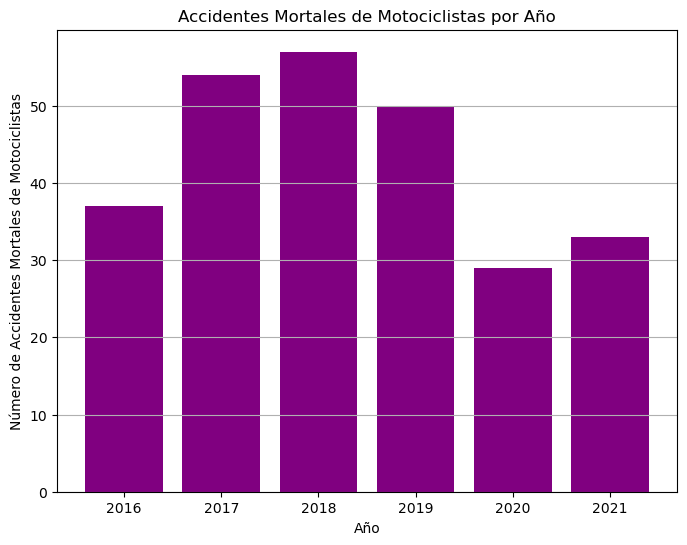

In [50]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(agnos, num_accidentes, color="purple")
plt.xlabel("Año")
plt.ylabel("Número de Accidentes Mortales de Motociclistas")
plt.title("Accidentes Mortales de Motociclistas por Año")
plt.xticks(agnos)  # Mostrar todos los años en el eje x
plt.grid(axis='y')  # Agregar una cuadrícula horizontal

# Mostrar el gráfico
plt.show()

In [51]:
# Resumen anual
resumen_anual = df_unido_moto.groupby("Agno_fallec")["Fallecido"].sum().reset_index()

In [52]:
# Se calcula la columna de accidentes mortales de moto AMM.
resumen_anual["AMM"] = ((resumen_anual["Fallecido"].shift(1) - resumen_anual["Fallecido"]) / (resumen_anual["Fallecido"].shift(1)) * 100).fillna(0)
resumen_anual["AMM"] = round(resumen_anual["AMM"], 2)

In [53]:
resumen_anual.dropna(subset=["Agno_fallec"], inplace=True)

In [54]:
resumen_anual

,Agno_fallec,Fallecido,AMM
0,1970,30,0.00
1,2016,37,-23.33
2,2017,54,-45.95
3,2018,57,-5.56
4,2019,50,12.28
5,2020,29,42.00
6,2021,33,-13.79


Como se puede apreciar en la gráfica anterior, desde el 2016 hubo un aumento en las fatalidades en motocicleta,
posiblemente por al aumento del uso de este vehículo, hasta el 2019-2020, donde hubo un descenso seguramente por el confinamiento
COVID, ya luego, aumentando las fatalidades por el levantamiento de las restricciones, nuevamente.

In [55]:
df_motos.to_csv("KPI2.csv", index=False)

In [56]:
data_lesionados_gral.head(2)

,Unnamed: 0,id,n_victimas,agno,mes,dia,franja_hora_new,comuna,geocodificacion_CABA,longitud,...,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,Poblacion
0,0,LC-2019-0000179,1,2019,1,1,9,14,Point (104991.46333918849995825 107720.9664748...,-58.408911,...,CICLISTA,SD,CICLISTA-SD,0,0,0,0,1,SD,3072029
1,1,LC-2019-0000053,1,2019,1,1,1,8,Point (101813.84712503915943671 95578.55507230...,-58.44351,...,AUTO,SD,AUTO-SD,0,1,0,0,0,SD,3072029


In [57]:
data_lesionados_espec.head(2)

,Unnamed: 0,ID hecho,AAA,MM,DD,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,0,LC-2019-0000053,2019,1,1,SD,MASCULINO,57,SD
1,1,LC-2019-0000063,2019,1,1,SD,SD,0,SD


In [58]:
conteo_gravedad = data_lesionados_espec["GRAVEDAD"].value_counts()

In [59]:
conteo_gravedad

GRAVEDAD
SD       27068
GRAVE      537
Name: count, dtype: int64

Tercera KPI:
3) Reducir en un 10% la tasa de lesiones graves por siniestros viales en CABA, en comparación con el año anterior.

Definición: La tasa de lesiones graves por siniestros viales se define como el número de personas que sufren lesiones graves en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.

Fórmula: (Número de lesiones graves en siniestros viales / Población total) * 100,000


In [60]:
# Calcular la tasa de morbilidad por accidentados para cada año en data_lesionados_gral
data_lesionados_gral["TasaMA"] = data_lesionados_gral["n_victimas"] / data_lesionados_gral["Poblacion"] * 100000

In [61]:
condiciones_lesion = (data_lesionados_espec["GRAVEDAD"] == "GRAVE")
df_lesionados = data_lesionados_espec[condiciones_lesion].copy()

In [62]:
# Unir las datas de lesionados gral y específico
df_unido_gravedad= pd.merge(data_lesionados_gral[["id", "n_victimas", "agno", "Poblacion", "TasaMA"]],
                      df_lesionados[["ID hecho", "AAA", "GRAVEDAD"]],
                      left_index=True, right_index=True)

In [63]:
df_unido_gravedad.head(2)

,id,n_victimas,agno,Poblacion,TasaMA,ID hecho,AAA,GRAVEDAD
12012,LC-2020-0127262,1,2020,3075646,0.032513,LC-2020-0049028,2020,GRAVE
12034,LC-2020-0129705,1,2020,3075646,0.032513,LC-2020-0450143,2020,GRAVE


In [64]:
# Agrupar lesionados GRAVE por año
df_grave = df_unido_gravedad[df_unido_gravedad["GRAVEDAD"] == "GRAVE"]
lesionados_por_agno = df_grave.groupby("AAA").agg(cant_grave=("GRAVEDAD", "count")).reset_index()

In [65]:
lesionados_por_agno

,AAA,cant_grave
0,2020,170
1,2021,177


In [66]:
# DF KPI#
df_KPI3 = df_unido_gravedad[df_unido_gravedad["GRAVEDAD"] == "GRAVE"][["AAA", "TasaMA", "GRAVEDAD"]].sort_values(by="AAA")

In [67]:
df_KPI3

,AAA,TasaMA,GRAVEDAD
12012,2020,0.032513,GRAVE
16636,2020,0.032480,GRAVE
16665,2020,0.032480,GRAVE
16693,2020,0.032480,GRAVE
16724,2020,0.032480,GRAVE
...,...,...,...
20629,2021,0.032480,GRAVE
20634,2021,0.097439,GRAVE
20637,2021,0.032480,GRAVE
19999,2021,0.032480,GRAVE


In [68]:
# Agrupado por año, Tasa de Morbilidad por accidente
df_agrupado_por_año = df_KPI3.groupby("AAA")["TasaMA"].sum().reset_index()

In [69]:
df_agrupado_por_año

,AAA,TasaMA
0,2020,5.914357
1,2021,7.048118


In [70]:
# Crear una nueva columna con Diferencia de TasaMA
df_agrupado_por_año["Diferencia_TasaMA"] = np.nan

# Calcular la diferencia con una máscara de año
mask_2021 = df_agrupado_por_año["AAA"] == 2021
df_agrupado_por_año.loc[mask_2021, "Diferencia_TasaMA"] = df_agrupado_por_año[mask_2021]["TasaMA"] - df_agrupado_por_año["TasaMA"].where(~mask_2021).shift(1)

In [71]:
df_agrupado_por_año

,AAA,TasaMA,Diferencia_TasaMA
0,2020,5.914357,NaN
1,2021,7.048118,1.133761


In [72]:
# porcentaje_cambio = (diferencia_tasa / tasa_año_1) * 100
porcentaje_cambio = round(((1.133761 / 5.914357) * 100), 1)
porcentaje_cambio

19.2

Hay un 19.2% de cambio entre el año 2020 y 2021 en cuanto a accidentados grave.

In [73]:
# Hay o no reducción del 10% en los lesionados graves por accidentes viales?
ultimo_agno = 2021
# if ((ultimo_agno_accidentes - agno_anterior_accidentes) / agno_anterior_accidentes) * 100 >= 7:
if porcentaje_cambio <= 10:
    print(f"La reducción en el año {ultimo_agno} es mayor o igual al 10%.")
else:
    print(f"La reducción en el año {ultimo_agno} es menor al 10%.")

La reducción en el año 2021 es menor al 10%.


In [74]:
df_KPI3.to_csv("KPI3.csv", index=False)